# Importación de librerías

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

# Creación de Clusters

In [14]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Importación de dataset

Datos obtenidos de:

*The Ulabox Online Supermarket Dataset 2017, accessed from https://www.github.com/ulabox/datasets*

In [ ]:
df = pd.read_csv("datasets/ulabox_orders_with_categories_partials_2017.csv")
df.describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,14999.500000,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087
std,2888.646245,8660.398374,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390
min,0.000000,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2541.750000,7499.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5043.000000,14999.500000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000
75%,7483.000000,22499.250000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000
max,10238.000000,29999.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# Preguntas

### **Pregunta1:** _Relación total_items y discount%_

> **Hipotesis:**
A mayor número de productos seleccionados en una compra, mayor será el porcentaje de descuento aplicado al total de la compra.

Para saber si existe o no existe una relación entre ambas variables, se empezará con un análisis general de sus comportamientos, para esto se realizará un **Diagrama de dispersión** donde:
- el **_eje x_** represente el **_número total de productos_**
- el **_eje y_** represente el **_porcentaje de descuento_** aplicado a la compra.

<AxesSubplot:xlabel='total_items', ylabel='discount%'>

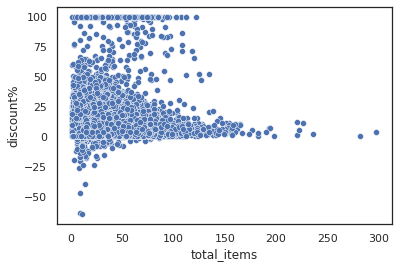

In [19]:
sns.scatterplot(data=df, x="total_items", y="discount%")

No se aprecia que la hipotesis se cumpla, pues existe una **gran amplitud en los rangos** de descuento e incluso en los casos con mayor número de items _(a partir de 200)_ los descuentos son pequeños.

Para indagar más y dar nuestra hipotesis por equivocada, realizaremos un **Mapa de calor** que nos muestre la correlación existente entre estas 2 variables, **de ser menor a 0.5** podemos concluir que no tienen relación.

<AxesSubplot:>

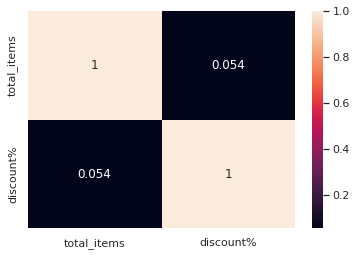

In [18]:
test1 = df.iloc[:,[2,3]]
sns.heatmap(test1.corr(), annot=True)

Como es evidente, al tener una **correlación menor a 0.1**, se puede concluir que no existe una relación directa entre el número de productos comprados y el descuento que se aplica en la compra y que por ende:

**es incorrecto decir que una gran compra te asegura un gran descuento.**